In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

# in short, regression problem, trying to predict disease progression based on
# a bunch of variables

# load dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
X = pd.DataFrame(diabetes_X)
y = diabetes_y

X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
# random forests
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=1, random_state=0, n_jobs=4)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200, 500, 1000, 2000],
    max_depth=[1, 2, 3, 4],
)

# search
reg = GridSearchCV(rf_model, rf_param_grid,
                   scoring='neg_mean_squared_error', cv=5)

search = reg.fit(X, y)

# best hyperparameters
search.best_params_

{'max_depth': 4, 'n_estimators': 2000}

In [4]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-3891.305592
1,"{'max_depth': 1, 'n_estimators': 20}",-3893.071727
2,"{'max_depth': 1, 'n_estimators': 50}",-3854.148676
3,"{'max_depth': 1, 'n_estimators': 100}",-3874.187590
4,"{'max_depth': 1, 'n_estimators': 200}",-3875.918730


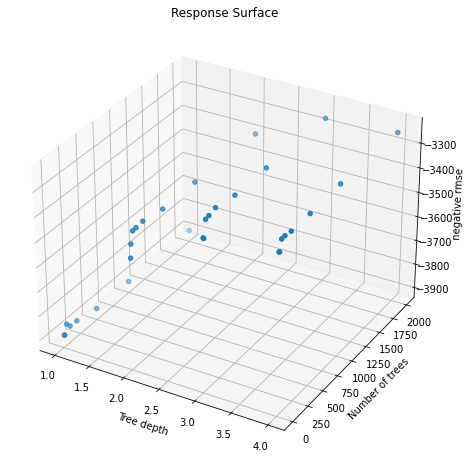

In [5]:
fig = plt.figure(figsize=(8, 8))

# syntax for 3-D projection
ax = plt.axes(projection='3d')

# depth
x = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
     3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4]

# number of trees
y = [10, 20, 50, 100, 200, 500, 1000, 2000, 10, 20, 50, 100, 200, 500, 1000, 2000,
     10, 20, 50, 100, 200, 500, 1000, 2000, 10, 20, 50, 100, 200, 500, 1000, 2000]

# performance
z = results['mean_test_score']

# plotting
ax.scatter(x, y, z,)
ax.set_title('Response Surface')
ax.set_xlabel('Tree depth')
ax.set_ylabel('Number of trees')
ax.set_zlabel('negative rmse')
plt.show()

The more parameters we optimize, the more complex the Response surface 